# Differential equations and numerical integration
## Euler method

We will mainly use ordinary differential equations of the form.

\begin{equation}
\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},\vec{p},t)
\end{equation}

Here $\vec{x}$ is a vector of state variables at time $t$.
The parameters of the system are represented
by the vector $\vec{p}$.

In one dimension, the system is written as
\begin{equation} \label{eq:SimpleEq}
\frac{dx}{dt} = f(x) \quad \mbox{with} \quad x(t=0) := x_0
\end{equation}

The simplest way to solve the equation numerically 
is the Euler integration
\begin{equation}
f(x) = \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}
\end{equation}

We obtain
\begin{equation}
x(t+\Delta t) \; = \;  x(t) \; + \; \Delta t \;   f(x(t)) \; + \;  {\cal O}(\Delta t^2)
\end{equation}

Starting from an initial value $x_0$ at time $t=0$ the solution
can now be determined for later time points.

It is of importance to consider the error of the method.
The Euler method introduces an error of ${\cal O}(\Delta t^2)$ per
integration step.
To obtain the solution $x(t)$ at a time $t=T$, $N=T/\Delta t$ integration steps
have to be performed. 
The total error is therefore of the order ${\cal O}(T \Delta t)$ 
and decreases with decreasing $\Delta t$.
Euler integration is a first-order method.
The method is rarely used in real life (too inefficient).

**The Euler Method**
\begin{equation} \label{eq:EulerSimpleEquation}
\frac{dC}{dt} = f(C) = - \frac{CL}{V} C \quad \mbox{with} \quad C(0) = \frac{DOSE}/{V}
\end{equation}


The analytical solution at time $t$ is 
\begin{equation} \label{eq:EulerBeispiel}
C(t) = \frac{DOSE}{V} \exp(-\frac{CL}{V} t)
\end{equation}

An initial value is needed for this process. Computational errors are minimized by keeping the time increments very small. There has been extensive development of algorithms to solve dif- ferential equations numerically, and in most contexts the dif- ference between an analytical solution and the approximate numerical solution is inconsequential. However, solving a system of equations is computationally intensive and, even with automated, rapid processors, there is a time penalty for using differential equations to describe a model.

We now write a simple function that compares the numerical integration 
of the simple system with the (known) analytical solution. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def simple_euler(C0, tend, N, CL, V):
    """ The function integrates the simple
    system dx/dt = -k x to a time tend using the  
    Euler method (N Steps) and initial condition x0.

    usage: C = simple_euler(C0, t, N)
    """
    k = 1 # set parameter k

    # some parameters
    dt = float(tend)/N
    timespan = np.arange(0, tend, dt)
    C = [float(C0)]

    # integration
    for i in range(1, N):
        # C(t) + dt * f
        C.append(C[i-1] + dt*(-CL/V*C[i-1]))
        
    # plot both solutions
    f, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(timespan, C,'ko', markersize=8, label='Euler method')
    ax.plot(timespan, C0*np.exp(-CL/V*timespan), 'r-', label='analytical solution')
    ax.set_xlabel('time t [hr]')
    ax.set_ylabel('C(t) [mg]')
    ax.legend(loc='upper right')
    plt.show()

    # return value of function
    cend = C[N-1]

    return cend, dt

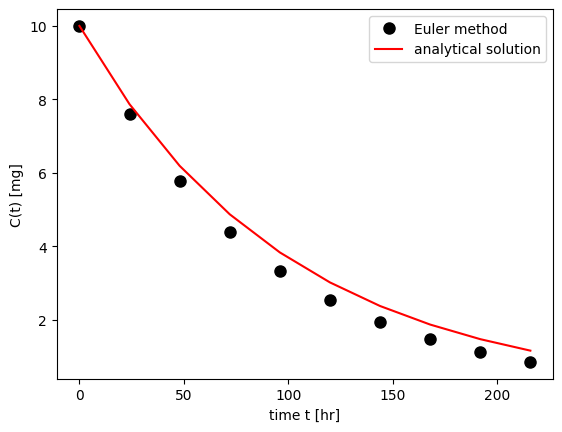

(0.8459064384657817, 24.0)

In [35]:
V = 10  # [l]
CL = 0.1  # [l/hr]
DOSE = 100  # [mg]
C0 = DOSE/V

simple_euler(C0=C0, tend=24*10, N=10, CL=CL, V=V)

**Exercise:** We do know the true value $x(t=1)$ using an analytical solution. Compare the numerical estimates for different values of `N` and plot the error as a function of `1/N`. 
What does `N` stand for? How does the graph look like? Why?

## Numerical integration in python
The module `scipy.integrate` offers a variety of build-in functions for numerical integration. We will mainly use the function `odeint`.

In [36]:
from scipy.integrate import odeint

We now consider the simple ODE of the form

\begin{equation}
\frac{dC}{dt} = - \frac{CL}{V} \cdot C
\end{equation}
\begin{equation}
C(0) = \frac{Dose}{V}
\end{equation}
where $CL$ and $V$ are parameters.

To solve the system numerically, we implement the function $f(C,t) = - \frac{CL}{V} \cdot C$
into a user-defined function.

A differential equation describes the rate of change of a variable. In this example, $\frac{dC}{dt}$ is the notation for the rate of change of concentration with respect to time (sometimes abbreviated as C′). Note that differential equations require specification of the initial value of the dependent variables. Here, the value of C at time zero (C0) is $Dose/V$. Numerical methods are needed to solve systems of differ- ential equations. 

In [37]:
def simple_ode(C, t, CL, V):
    """
    The function implements the simple linear
    ODE dCdt = -CL/V * C
    """

    dCdt = - CL/V *C

    return dCdt 

To integrate the system numerically, we use `odeint`:

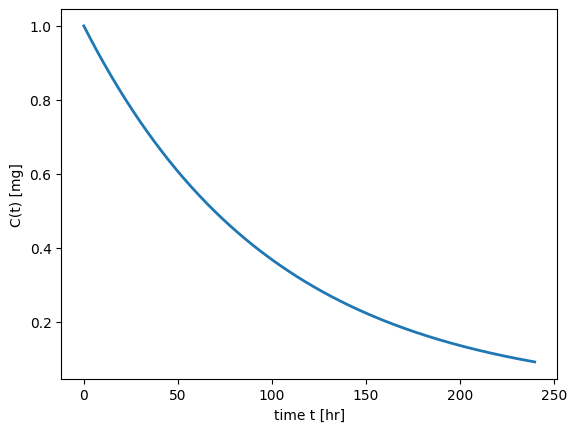

In [41]:
from scipy.integrate import odeint
import numpy as np

# parameters
V = 10  # [l]
CL = 0.1  # [l/hr]
DOSE = 100  # [mg]


# initial condition and time span
t = np.arange(0, 240, 0.1)  # [hr]
C0 = DOSE/V

C = odeint(simple_ode, C0, t, args=(CL, V))
f, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel('time t [hr]')
ax.set_ylabel('C(t) [mg]')
ax.plot(t, C, linewidth=2)
plt.show()